In [1]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')


In [2]:
matplotlib.rc('figure', titlesize='24')
matplotlib.rc('legend', fontsize='medium')
matplotlib.rc('axes', titlesize='22', titleweight='bold')
matplotlib.rc('xtick', labelsize='18')
matplotlib.rc('ytick', labelsize='18')
matplotlib.rc('axes', labelsize='20')
matplotlib.rc('font', size='18')

# Parameters

In [121]:
paramss = {
        "np": [50,100,200],
        "m" : [0.1,0.3,0.4,0.6,0.8],
        "t" : [3,5,7,10],
        "c" : [1,2,3,4],
        "me" : ["swap","opt"]
        }


In [122]:
params_np_t  =[
        {"np": 50, "t" : 3},
        {"np": 100, "t" : 3},
        {"np" : 150, "t" : 3},
        {"np" : 200, "t" : 3},
        {"np" : 250, "t" : 3},
        {"np" : 300, "t" : 3},
        {"np": 50, "t" : 5},
        {"np": 100, "t" : 5},
        {"np" : 150, "t" : 5},
        {"np" : 200, "t" : 5},
        {"np" : 250, "t" : 5},
        {"np" : 300, "t" : 5},
        {"np": 50, "t" : 7},
        {"np": 100, "t" : 7},
        {"np" : 150, "t" : 7},
        {"np" : 200, "t" : 7},
        {"np" : 250, "t" : 7},
        {"np" : 300, "t" : 7},
        {"np": 50, "t" : 10},
        {"np": 100, "t" : 10},
        {"np" : 150, "t" : 10},
        {"np" : 200, "t" : 10},
        {"np" : 250, "t" : 10},
        {"np" : 300, "t" : 10},
        ]

In [174]:
params_m = []

for j in paramss["m"]:
    params_m.append({"np": 200, "t" : 8 , "m" : j})

params_c = []
    
for j in paramss["c"]:
    params_c.append({"np": 200, "t" : 8 , "c" : j})


params_me = []
for j in paramss["me"]:
    params_me.append({"np": 200, "t" : 8 , "me" : j})

# Reading files and formating them

In [136]:
def params(x, dic):
    temp = x.split("\n")
    temp = list(map(lambda l : l.split(":"), temp))
    if(temp[0] == ['']):
        temp.pop(0)
    toret = {
        'params': dic[int(temp[0][1])],
        'fitness' : float(temp[1][1])
    }
    return toret


# Tournament and pop size

In [125]:
myfile = open("tournAndPop.txt", "r")
data = myfile.read()
myfile.close()
data = data.split("#")
md = list(map(lambda l : params(l,params_np_t), data))

In [126]:
tp = {
    3 :[],
    5 : [],
    7 : [],
    10 : []
}
for k in md:
    tp[k['params']['t']].append((k['params']['np'],k['fitness']))

Text(0, 0.5, 'Fitness')

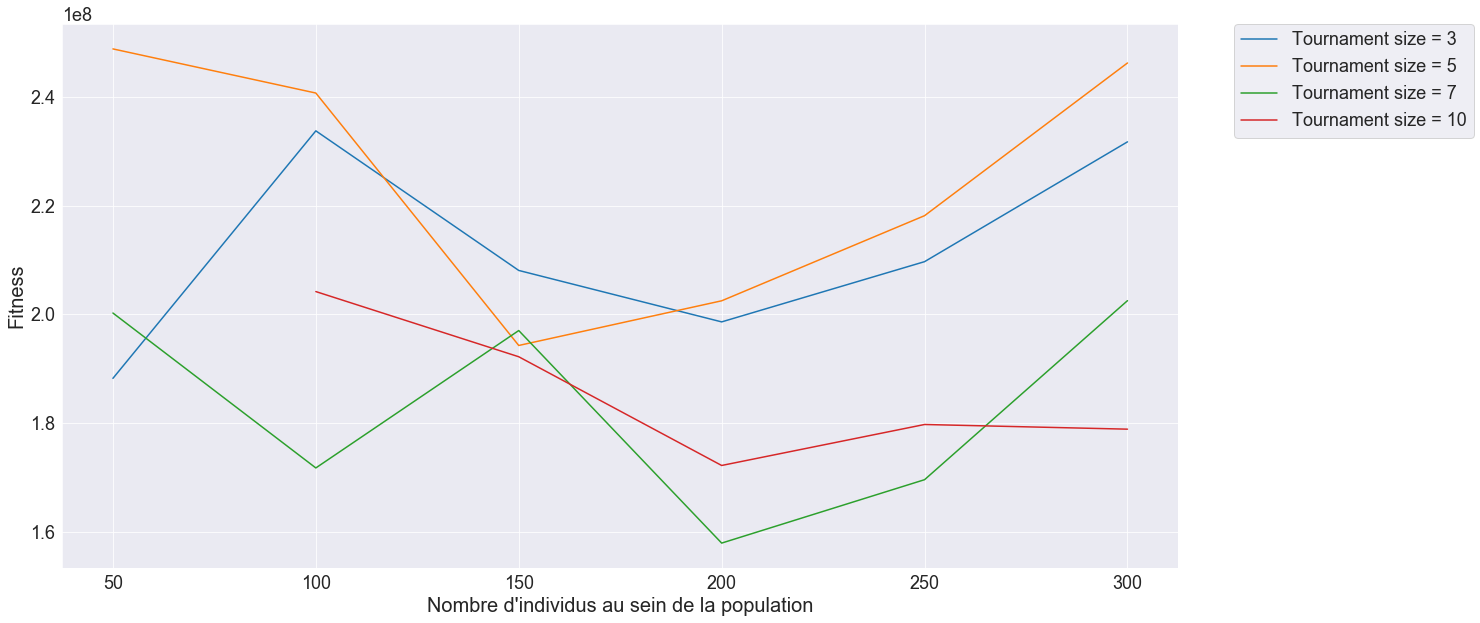

In [127]:
plt.figure(figsize=(20,10))
for l in tp :
    toprint = list(zip(*sorted(tp[l])))
    plt.plot(toprint[0],toprint[1], label = "Tournament size = "+str(l))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel("Nombre d'individus au sein de la population")
plt.ylabel("Fitness")

# Mutation

In [128]:
[0.1,0.3,0.4,0.6,0.8]

[0.1, 0.3, 0.4, 0.6, 0.8]

In [137]:
myfile = open("mutation.txt", "r")
data = myfile.read()
myfile.close()
data = data.split("#")
md = list(map(lambda l : params(l,params_m), data))

In [140]:
tp = {
    0.1 :[],
    0.3: [],
    0.4: [],
    0.6: [],
    0.8: []
}
for k in md:
    tp[k['params']['m']].append(k['fitness'])

Text(0, 0.5, 'Fitness')

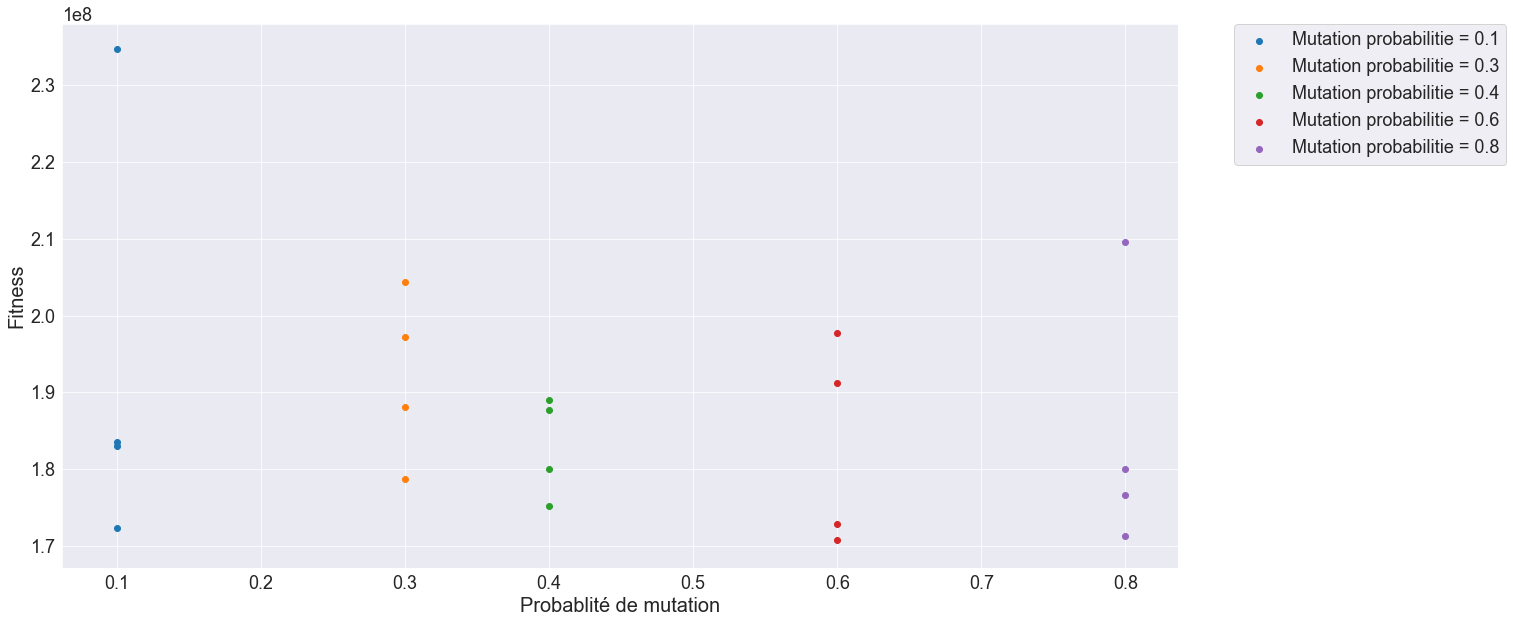

In [158]:
plt.figure(figsize=(20,10))
for l in tp :
    toprint = [[l,l,l,l],tp[l]]
    plt.scatter(toprint[0],toprint[1], label = "Mutation probabilitie = "+str(l))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.xlabel("Probablité de mutation")
plt.ylabel("Fitness")

In [165]:
toprint = [(l,np.median(np.array(tp[l]))) for l in tp]

Text(0, 0.5, 'Fitness')

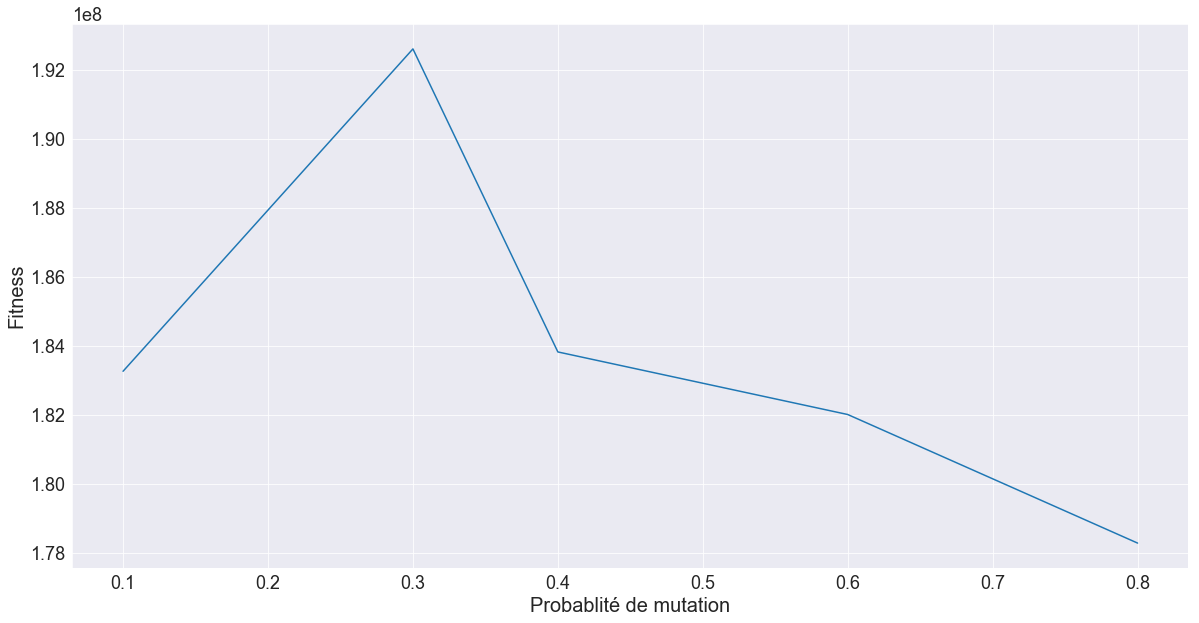

In [170]:
plt.figure(figsize=(20,10))

toprint = [(l,np.median(np.array(tp[l]))) for l in tp]
toprint = list(zip(*toprint))
plt.plot(toprint[0],toprint[1])
plt.xlabel("Probablité de mutation")
plt.ylabel("Fitness")


Text(0, 0.5, 'Fitness')

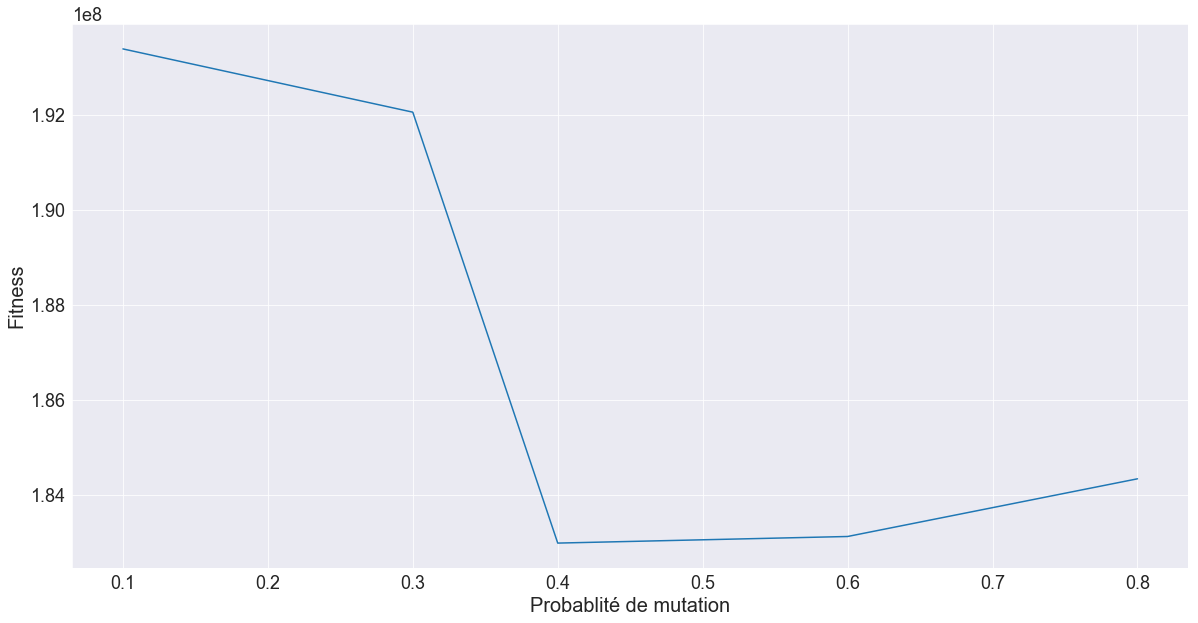

In [171]:
plt.figure(figsize=(20,10))

toprint = [(l,np.mean(np.array(tp[l]))) for l in tp]
toprint = list(zip(*toprint))
plt.plot(toprint[0],toprint[1])
plt.xlabel("Probablité de mutation")
plt.ylabel("Fitness")


# Plot graph best solution

In [181]:
from sympy.combinatorics.prufer import Prufer
bestsol= Prufer.to_tree([22, 20, 0, 24, 18, 26, 19, 1, 11, 15, 17, 14, 11, 20, 11, 6, 11, 16, 17, 11, 6, 6, 11, 11, 25, 11, 11, 23])

In [183]:
fromm = [k[0] for k in bestsol]
to = [k[1] for k in bestsol]

In [193]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections

df = pd.DataFrame({ 'from':fromm, 'to':to})

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


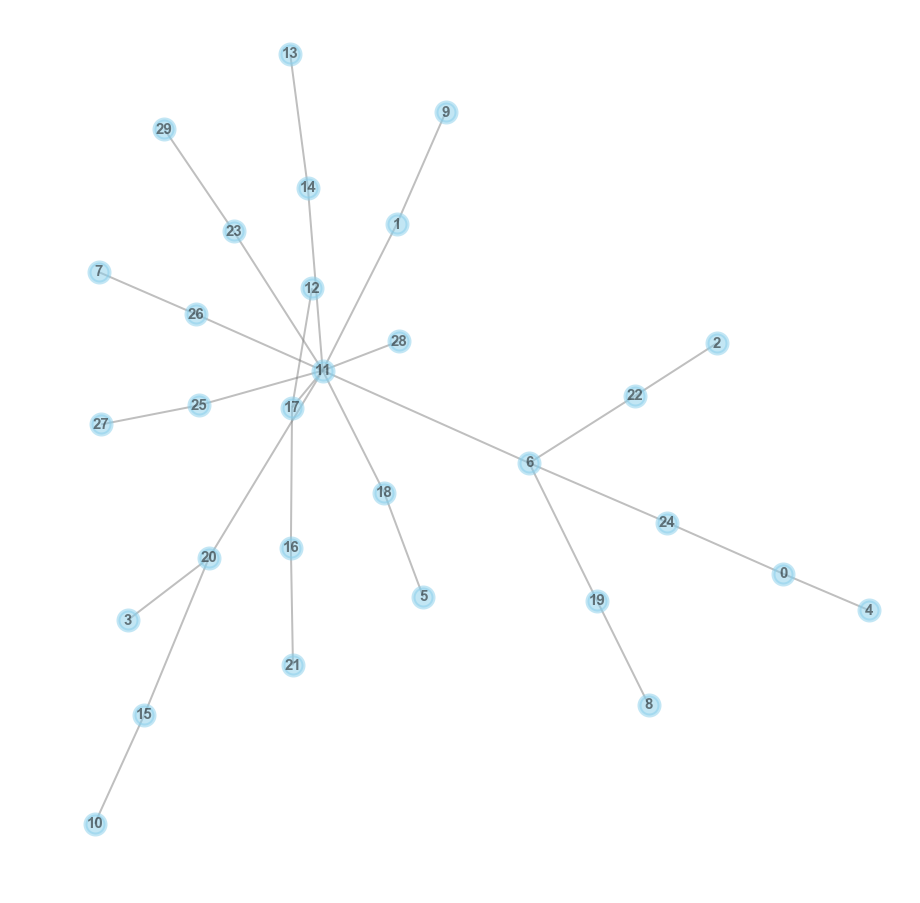

In [198]:
plt.figure(figsize=(12,12)) 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to')

 
# All together we can do something fancy
nx.draw(G, with_labels=True, node_size=400, node_color="skyblue", node_shape="o", alpha=0.5, linewidths=4, font_size=15, font_color="black", font_weight="bold", width=2, edge_color="grey")
